# Polynomial Regression Model - Temperature vs Yield Data Set

**Build a polynomial regression model to predict Yield **

From: https://newonlinecourses.science.psu.edu/stat501/node/325/

Polynomial regressions are a particular type of linear regression, and they can be evaluated/tested in the same manner of simple and multiple linear regressions.

In [1]:
# import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# # import statsmodels.api as sm
# import statsmodels.formula.api as smf
# # from statsmodels.graphics.gofplots import qqplot
# # from statsmodels.stats.outliers_influence import variance_inflation_factor

# from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.metrics import mean_squared_error, r2_score

# Imports other notebooks
# import import_ipynb
# import regression_lib as rl

In [2]:
import sys
sys.path.insert(0, '../../src')
import regression_functions_utils as rfu

### Loading data

In [3]:
dtf = pd.read_csv('temp_yield.csv').drop(['i'], axis=1)
dtf

,temp,yield
0,50,3.3
1,50,2.8
2,50,2.9
3,70,2.3
4,70,2.6
5,70,2.1
6,80,2.5
7,80,2.9
8,80,2.4
9,90,3.0


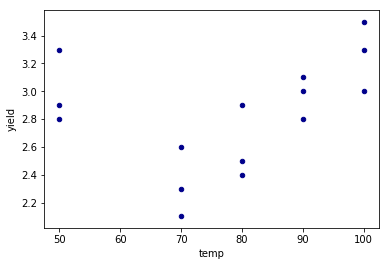

In [4]:
ax = dtf.plot.scatter(x='temp', y='yield', c='DarkBlue')

### Polynomial Simple Linear Regression

In [5]:
y = dtf['yield']
X = dtf.temp.values.reshape(-1,1)
lm = LinearRegression()

In [6]:
deg=3
pf = PolynomialFeatures(degree=2)
X_poly = pf.fit_transform(X)
lm_poly = lm.fit(X_poly, y)
y_pred = lm_poly.predict(X_poly)

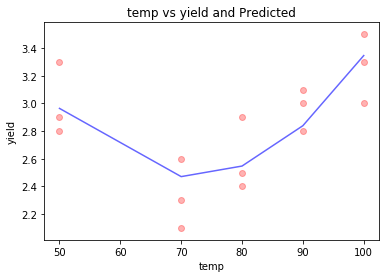

In [8]:
rfu.plot_scatter_line(x=X, y=y, y_pred=y_pred, x_name='temp', y_name='yield', y_pred_name='yield pred')

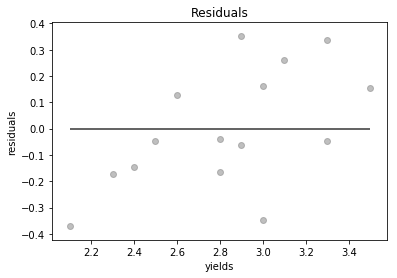

In [9]:
y_pred_errors = y - y_pred
rfu.plot_residuals(x=y, y=y_pred_errors, x_name='yields', y_name='residuals')

In [10]:
print('R2 = {} '.format(lm_poly.score(X_poly, y)))
print('Coef = {} '.format(lm_poly.coef_))

R2 = 0.6732052768464263 
Coef = [ 0.         -0.15371134  0.0010756 ] 


### Predict yield for new temperature

In [11]:
new_temp = 75
new_temp_poly = pf.transform([[new_temp]])
lm_poly.predict(new_temp_poly)

array([2.48238832])

#### Plotting a smoother prediction line 

In [16]:
temp_min = 50 
temp_max = 100
temps_lst = [i for i in range(temp_min, temp_max, 1)]
temps_lst = np.array(temps_lst).reshape(-1,1)
temps_poly_lst = pf.transform(temps_lst)
temps_poly_lst_pred = lm_poly.predict(temps_poly_lst)

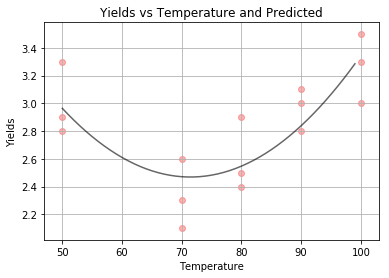

In [17]:
plt.plot(temps_lst, temps_poly_lst_pred, color='black', alpha=.6)
plt.scatter(X, y, color='r', alpha=.3)
plt.title('{} vs {} and Predicted'.format('Yields', 'Temperature'))
plt.xlabel('Temperature')
plt.ylabel('Yields')
plt.grid()
plt.show()